# A comprehensive guide to learn BP artificial neural networks 

> About the author: Jinming Yang(杨津铭), an undergraduate school student in Sun Yat-Sen University who focuses on machine learning and transportation research. Email: mountty@qq.com

This notebook will give a comprehensive introduction to the math and mechanism behind neural networks through a fully self-coded python demo. You will learn what an artificial neural network is, what is the mechanism behind it and how to easily implement a neural network through a mighty tool for ML & DL- Tensorflow.

> Github: https://github.com/Vadermit/Learning-machine-learning/tree/master/neural_network

## What is Artificial Neural Networks?

Artificial Neural Networks are structured and integrated processors which contians multiple parameters and operations. Like an ordinary function, you feed in inputs, the neural networks will give you outputs in return. The difference is, you don't have to manually design the functions bit by bit in neural networks, you don't have to set the complicated parameters and operations based on physical model you want to describe. Instead, you can use the sofisticated structure - Artificial Neural Networks, and you feed in labeled datas(I will talk about it later) to train(adjust) the parameters in the neural network and then the neural network may better fit the inputs and outputs than the functions you take days to derive manually based on its physical model.

This is what a three layer neural network with three neurons in each of the first two layers looks like:
<img src="images/3layer_nn.jpg" alt="Drawing" style="width: 400px;"/>

## Structure of artificial neurons
### Neurons in the input layer
There is nothing fancy thing in the neuron of the input layer. It doesn't have the sum nor the activation operation as neurons in other layers do. Here is a structure demonstration of the first input neuron in the example artificial neural network above.

<img src="images/input_neuron.png" alt="Drawing" style="width: 400px;"/>

You can see that the input remains unchanged after it went through the input neuron.

### Neurons in the hidden layer
In the hidden layer, things get a little bit different. Neurons in hidden layers was feed in weighted outputs from higher layer. Neurons in hidden layers will sum the inputs up, then pass the summation to an activation function which we will not dig deep here. You can check the blog written by Avinash: https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0. Here comes another structure demonstration of a neuron, but this time, the neuron comes from the hidden layer.

<img src="images/hidden_layer_neuron.png" alt="Drawing" style="width: 500px;"/>

The inputs went through three operations in the hidden layer: multiplied bu a weight, sum the weighted inputs up and pass through the activation function.

### Neurons in the output layer
There is not much difference between neurons in hidden layer and the output layer. Here is a demonstration.

<img src="images/output_neuron.png" alt="Drawing" style="width: 500px;"/>

### Bias
Now some of you might ask what is the grey <span style="color:blue">$b$</span> in the ANN structure above stands for. Well actually, the <span style="color:blue">$b$</span>s above are not neurons. They are just biases which are fed into neurons in the next layer as the outputs of the current layer do. Let's look at the operations in a hidden layer neuron in math, and you will understand what a bias do.

$$h_1 = f(w_{11}^{(1)}x_1+w_{21}^{(1)}x_2+w_{31}^{(1)}x_3+\color{red}{b_1^{(1)}})$$

Where <span style="color:blue">$f(\bullet)$</span> is the activation funtion.

## Activation Function
Now we can see, the artificial neurons mainly do two things: calculating the weighted summation of inputs coming from higher layer, then feed it in the activation function. Then what is activation function? what does it do?

Well basically, you can imaging the activation function as a gate, it decides whether and how much to let the sum pass through the neuron. So, the activation function decides whether and how much a neuron would affect deeper layers. And mathematically the activation function increased the nonlinearity of the neural network so it can fit some nonlinear relations.

There are many kinds of activation functions, and here I'll only introduce 3 of them: sigmoid, tanh and ReLU. The detail of activation function can be seen on https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0.

### Sigmoid
The sigmoid activation function looks like this:
$$f(z) = \frac{1}{1+e^{-z}}$$
<img src="images/sigmoid.png" alt="Drawing" style="width: 350px;"/>

Its derivative is:
$$\frac{df(z)}{dz} = f(z)(1 - f(z))$$

### Tanh
The tanh activation function looks like this:
$$f(z) = \frac{2}{1+e^{-2z}} - 1$$
<img src="images/tanh.png" alt="Drawing" style="width: 350px;"/>

Its derivative is:
$$\frac{df(z)}{dz} = 1 - f(z)^2$$

### ReLU
The ReLU activation function looks like this:
$$f(z) = max(0, z)$$
<img src="images/ReLU.png" alt="Drawing" style="width: 350px;"/>

Its derivative is:
$$\frac{df(z)}{dz} = \left\{
\begin{aligned}
0, & & z < 0\\
1, & & z > 0 \\
\end{aligned}
\right.
$$

# Feedforward Process
The feedforward process of the artificial neural network mentioned before can be represented by a python code as follows:

First we need to import some supporting function library:
* numpy: providing data structure and matrix calculation support

In [331]:
import numpy as np

#### Activation Function
We introduce three kinds of activation functions(i.e. sigmoid, tanh, ReLU) plus one no activation scenario(i.e. Non: $f(z) = z$).

In [332]:
def activationFunc(x, ActFun, l):
    if ActFun[l] == 'sigmoid':
        f = 1 / (1 + np.exp(-x))
    if ActFun[l] == 'ReLU':
        if x.shape[0] == 1:
            f = x
            if y < 0:
                f = np.array([0])
        else:
            f = x
            f[x < 0] = 0
    if ActFun[l] == 'tanh':
        f = np.tanh(x)
    if ActFun[l] == 'Non':
        f = x
    return f

#### Feedforward function: ann()
Now we'll come to the feedforward function **<span style="color:blue">ann(x, W, b, ActFun)</span>** in the ANN. Feed in an input, the **ann()** function will provide you the output.

* The **structure** of ANN hides in the structure of ANN parameters(i.e. **W** and **b**). User can choose activation function for each layer through **ActFun**. 

* **W** is a python list, each element in which is a numpy array holding the connection weights of the respective layer. The following example shows the **W** and **b** in the three layer demo ANN mentioned before.

In [333]:
w1 = np.array([[1,1,1], [2,2,2], [3,3,3]]) #weights between input layer and hidden layer
w2 = np.array([[1], [1], [1]]) #weights between hidden layer and output layer
W = [w1, w2]
print('There are %d layers in the ANN, including %d hidden layers.'%(len(W), (len(W) - 1)))
print('The number of inputs is:%d'%(w1.shape[0]))
print('The number of hidden layer neurons is:%d'%(w1.shape[1]))
print('The number of outputs is:%d'%(w2.shape[1]))

There are 2 layers in the ANN, including 1 hidden layers.
The number of inputs is:3
The number of hidden layer neurons is:3
The number of outputs is:1


* **b** is also a python list, each element in which is a numpy array holding the bias of the respective layer.

In [334]:
b1 = np.array([1,1,1])
b2 = np.array([0])
b = [b1, b2]
print('There are %d layers in the ANN, including %d hidden layers.'%(len(b)+1, len(b)))
print('The number of hidden layer neurons is:%d'%(b1.shape[0]))
print('The number of outputs is:%d'%(b2.shape[0]))

There are 3 layers in the ANN, including 2 hidden layers.
The number of hidden layer neurons is:3
The number of outputs is:1


* **ActFun** is also a python list denoting the respective activation function of each hidden layer and output layer.

In [335]:
#chosing activation function for the hidden layer and output layer in the three layer ann
ActFun = ['sigmoid', 'sigmoid'] #'tanh', 'ReLU', 'Non' are also available

In [336]:
def ann(x, W, b, ActFun):
    L = len(W) # number of hidden & output layers
    dim = np.ones(L, dtype = 'int') # number of neurons in L hidden&output layers
    for l in range(L):
        dim[l] = W[l].shape[1]
    
    Y = [] #outputs of L layers
    for l in range(L):
        Y.append(np.zeros(dim[l]))
    
    h = x.copy()
    for l in range(L):
        z = np.matmul(W[l].T, h) + b[l]  #weighted summation
        h = activationFunc(z, ActFun, l)   #activation function
        Y[l] = h.copy()
    return Y
    

#### Feedforward experiment
Now we will create a simple three layer ANN as mentioned before, with three inputs and one output. We randomly chosing some parameters for the ANN and feed in an input, the ann() function will give us not only the final output from the output layer, but also outputs from hidden layers(in this demonstration, there is only one hidden layer)

In [337]:
#weights between layer 0(input) and layer 1(hidden)
w1 = np.array([[0.3,0.3,0.3],[0.5,0.2,0.4],[0.6,0.1,0.3]])

#weights between layer 1(hidden)
w2 = np.array([[0.3], [0.3], [0.3]])

#bias
b1 = np.array([0.5,0.5,0.5])

b2 = np.array([0.5])

W = [w1, w2]
b = [b1, b2]
ActFun = ['Non', 'sigmoid'] #select activation functions for the hidden layer and output layer
x = np.array([1,2,3]) #the input of the ann
Y = ann(x, W, b, ActFun) # ann feedforward

print('Output of the hidden layer is:')
print(Y[0])
print('The output of the artificial neural network is:')
print(Y[-1])

Output of the hidden layer is:
[3.6 1.5 2.5]
The output of the artificial neural network is:
[0.94158544]


## What on earth is labeled data?
In order to train the neural network to fit the input and output, we need to feed in the input and the output we want simultaneously. In the regression scenario below, we need to input both the independent variables and the function values in the neural network. The function value <span style="color:blue">$y$</span> with respect to each independent variable <span style="color:blue">$x$</span> is the label of <span style="color:blue">$x$</span>. And we call <span style="color:blue">$(x, y)$</span>(e.g. <span style="color:blue">$(1,3.6), (3,14.5), \dots$</span>) labeled observations (or entries).
<img src="images/linear_reg.png" alt="Drawing" style="width: 400px;"/>

And in image classifications. The classification(what's in that picture e.g. cat, dog,...) corresponding to each picture is the label of that picture.
<img src="images/image_labeling.png" alt="Drawing" style="width: 500px;"/>
In this case, (img1, airplane), (img2, dog), (img3, cat),... are the labeled inputs to train a image classification artificial neural networks.

In fact, the label is the thing that we hope the artificial neural network would automatically derive when we put an input in it.

## The cost function
Now, we have the input to an ANN and its corresponding output we desire simultaneously. We want to know how close the output of the artificial neural network is to the output we actually desire. And we want to know what is contributing to the distance between them. So we introduce the cost function to describe the distance between the ANN output and the desired one. For an output vector <span style="color:blue">$\boldsymbol{y}_\_ \in \mathbb{R}^{d_o}$</span> with respect to the input vector <span style="color:blue">$\boldsymbol{x} \in \mathbb{R}^{d_i}$</span> which has the label <span style="color:red">$\boldsymbol{y} \in \mathbb{R}$</span>, the cost function can be demonstated as follows:

$$J(\boldsymbol{w},\boldsymbol{b},\boldsymbol{x},\boldsymbol{y})=\frac{1}{2}||\boldsymbol{y}_\_-\boldsymbol{\color{red}y}||_2^2=\frac{1}{2}||\boldsymbol{y}_\_-\color{red}{h(}\boldsymbol{\color{red}x}\color{red})||_2^2$$

Where <span style="color:blue">$h(\bullet)$</span> denotes the feed-forward process in the artificial neural network. It should be noticed that the loss function in terms of the 2-norm is not the only form of the loss function.

In the simple scalar output of the illustrated three layer ANN mentioned before, the cost function is like:

$$J(\boldsymbol{w},\boldsymbol{b},\boldsymbol{x},y) = \frac{1}{2}(y_\_-\color{red}y)^2 = \frac{1}{2}(y_\_-\color{red}{h(}\boldsymbol{\color{red}x}\color{red}))^2$$

Where $\color{blue}{y_\_}$ and $\color{blue}y$ are scalars and $\boldsymbol{\color{blue}x}$ is the input vector of length 3.

## Backpropagation
Now, we have the cost function which denotes the distance between the output of the ANN and the output we want. The next thing we want to do is to calibrate the parameters in the artificial neural network so that the distance would become smaller and smaller. So firstly, we need to figure out how the parameters in the ANN(<span style="color:blue">$\boldsymbol{W},\boldsymbol{b}$</span>) affect the cost function. And we manage this by the so-called **<span style="color:blue"> backpropagation</span>** process which is based on the chain rule.

### Backpropagation in the output layer


Let's look back to the cost function in the three layer ANN mensioned before. The label <span style="color:blue">$y_\_$</span> is a constant. Hmmm, so the only thing that would affect the cost function is the output <span style="color:blue">$y = f(\boldsymbol{x})$</span>. So first, I will find a way to quantify how the output <span style="color:blue">$y$</span> contributes to the cost function. Yes, you guess it right, I will calculate the **<span style="color:blue">Derivative</span>** of <span style="color:blue">$J$</span> with respect to <span style="color:blue">$y$</span>.

$$\frac{dJ}{dy} = y - y_\_$$

Now we consider, what contributes to the output <span style="color:blue">$y$</span>. We will look back to the detailed structure of the output layer neuron, this time I will add an intermediate variable after the summation operation.

<img src="images/output_breakdown.png" alt="Drawing" style="width: 550px;"/>

$$z_o = w_1^{(2)}h_1 + w_2^{(2)}h_2 + w_3^{(2)}h_3 + b_2$$

$$y = f(z_o) = \frac{1}{1+e^{-z}}$$

Before outputting, the intermediate variable <span style="color:blue">$z_o$</span> passes through an activation function <span style="color:blue">$f(\bullet)$</span>. The output <span style="color:blue">$y$</span> would affect the value of the cost function, and the intermediate variable <span style="color:blue">$z_o$</span> would affect the output. So if we want to know how the inermediate variable <span style="color:blue">$z_o$</span>  affcets the value of the cost function, we need to figure how it affects the output <span style="color:blue">$y$</span> first ---- we need to calculate the derivative of the activation function with respect to <span style="color:blue">$z_o$</span>.

There are many kind of activation functions: **sigmoid**, **ReLU**, **softmax**, **tanh**, ... For example, if the activation function in the demonstration ANN is **sigmoid** which looks like this:

<img src="images/sigmoid.png" alt="Drawing" style="width: 350px;"/>

Then we have:

$$\frac{y}{dz_o} = f'(z_o) = f(z_o)(1-f(z_o)) = y(1-y)$$

So, according to the chain rule, the derivative of the cost function with respect to the intermediate variable <span style="color:blue">$z_o$</span> is:

$$\frac{dJ}{dz_o} = \frac{dJ}{dy} \frac{dy}{dz_o} = y(y - y_\_)(1-y)% = -y^3+y^2-y_\_y+y_\_y^2$$

Back to the problem we want to solve: we want to adjust the parameters in the neural network(e.g. <span style="color:blue">$W,b$</span>) to minimize the cost function, so we need to figure out how the parameters will affect the cost function --- we need to calculate the dirivative of costfunction $J$ with respect to those parameters. Now we already have the derivative of $J$ with respect to <span style="color:lue">$z$</span>, to calculate that of $J$ with respect to parameters <span style="color:blue">$w_1^{(2)},w_2^{(2)},w_3^{(2)},b_2$</span> in the output layer, we need to calculate:

$$\frac{\partial{z}}{\partial{w_1^{(2)}}} = h_1$$
$$\frac{\partial{z}}{\partial{w_2^{(2)}}} = h_2$$
$$\frac{\partial{z}}{\partial{w_3^{(2)}}} = h_3$$
$$\frac{\partial{z}}{\partial{b_2}} = 1$$

 According to th chain rule, the derivatives of the cost function $J$ with respect to the parameters in the output layer are calculated as follows:
$$\frac{\partial{J}}{\partial{w_1^{(2)}}} = \frac{dJ}{dy} \frac{dy}{dz} \frac{\partial{z}}{\partial{w_1^{(2)}}} = h_1 y(y-y_\_)(1-y)$$
$$\frac{\partial{J}}{\partial{w_2^{(2)}}} = \frac{dJ}{dy} \frac{dy}{dz} \frac{\partial{z}}{\partial{w_2^{(2)}}} = h_2 y(y-y_\_)(1-y)$$
$$\frac{\partial{J}}{\partial{w_3^{(2)}}} = \frac{dJ}{dy} \frac{dy}{dz} \frac{\partial{z}}{\partial{w_3^{(2)}}} = h_3 y(y-y_\_)(1-y)$$
$$\frac{\partial{J}}{\partial{b_2}} = \frac{dJ}{dy} \frac{dy}{dz} \frac{\partial{z}}{\partial{b_2}} = y(y-y_\_)(1-y)$$

Now we have the derivatives of the cost function J with respect to the parameters in the output layer.

## Backpropagtion in the hidden layer
If we look at the structure of the neurons(both hidden and output layer), we'll find that all the parameters(<span style="color:blue">$W,b$</span>) are directly linked to those intermediate variables <span style="color:blue">$z$</span>. 

<img src="images/hidden_output.png" alt="Drawing" style="width: 800px;"/>

$$z_{h1} = \color{red}{w_{11}^{(1)}}x_1 + \color{red}{w_{21}^{(1)}}x_2 + \color{red}{w_{31}^{(1)}}x_3 + \color{red}{b_1}$$

$$z_o = \color{red}{w_1^{(2)}}h_1 + \color{red}{w_2^{(2)}}h_2 + \color{red}{w_3^{(2)}}h_3 + \color{red}{b_2}$$

Deriving the derivations of those intermediate variables with respect to those parameters is quite easy. The difficult part is deriving the derivations of cost function J with respect to those intermediate variables <span style="color:blue">$z$</span>.

Let's leave that example behind for a while, and assume a $(1+L)$ layer ANN with one output layer, $(L-1)$ hiddden layer and one output layer. $l=0$ denotes the input layer and $l=L$ denotes the output layer. For neurons in layer $l={1,2,...,L}$, there exit intermediate variables <span style="color:blue">$z_i^{l}, i=1,2,..,n_l$</span>. <span style="color:blue">$n_l$</span> is the number of neurons in that layer(e.g. <span style="color:blue">$n_L$</span> denotes the number of output neurons). 

<img src="images/n_plus_one_ann.png" alt="Brawing" style="width: 450px;"/>

Calculating the derivative of J with respect to <span style="color:blue">$z_i^{(L)}, i = 1,2,...,n_L$</span> is quite easy. And we introduce variable <span style="color:blue">$\delta_i^{(L)}$</span> denoting the derivative of J with respect to <span style="color:blue">$z_i^{(L)}$</span>.

$$\delta_i^{(L)} = \frac{\partial{J}}{\partial{z_i^{(L)}}} = \frac{\partial{J}}{\partial{o_i}} \frac{do_i}{dz_i^{(L)}}$$

Then how do we calculate the derivatives of cost function J with respect to intermediate variavles <span style="color:blue">$z_i^{(l)}$</span> i.e. <span style="color:blue">$\delta_i^{(l)}$</span>, $i = 1,2,...,n_l, l = 1,2,...,L-1$ in previous layers?

The intermediate variables <span style="color:blue">$z_i^{(L-1)}$</span> in the last hidden layer affect the cost funtion J by affecting the intermediate variables <span style="color:blue">$z_i^{(L)}$</span> in output layer. Each intermediate variable in layer $L-1$ contributes to all $n_L$ variables <span style="color:blue">$z_i^{(L)}$</span> in the next layer(output layer). So the derivative <span style="color:blue">$\delta_i^{(L-1)}$</span>,$i = 1,2,...,n_{L-1}$ is:

$$\delta_i^{(L-1)} = \sum_{j=1}^{n_L}\frac{\partial{J}}{\partial{z_j^{(L)}}}\frac{\partial{z_j^{(L)}}}{\partial{z_i^{(L-1)}}} = \sum_{i=1}^{n_L} \delta_i^{(L)} w_{ij}^{(L)} f^{(L-1)’}(z_i^{(L-1)})$$

Where <span style="color:blue">$w_{ij}^{(L)}$</span> denotes the weight of link from neuron $i$ in layer $L-1$ to neuron $j$ in layer $L$, and $f^{(L-1)’}(z_i^{(L-1)})$ denotes the derivative of the activation function in neuron $i$ in layer $L-1$.

Actually we can recursively computing <span style="color:blue">$\delta_i^{(l)}$</span>, $i = 1,2,...,n_l, l = 1,2,..., L-1$ by:

$$\delta_i^{(l)} = \left\{
\begin{aligned}
\frac{\partial{J}}{\partial{z_i^{(l)}}} = \frac{\partial{J}}{\partial{o_i}} \frac{do_i}{dz_i^{(l)}}, & & l = L\\
\sum_{j=1}^{n_{l+1}}\frac{\partial{J}}{\partial{z_j^{(l+1)}}}\frac{\partial{z_j^{(l+1)}}}{\partial{z_i^{(l)}}} = \sum_{j=1}^{n_{l+1}} \delta_j^{(l+1)} w_{ij}^{(l+1)} f^{(l)’}(z_i^{(l)}), & & l = 1,2,...,L-1 \\
\end{aligned}
\right.
$$

The backpropagation process for intermediate variables <span style="color:blue">$z_i^{(l)}$</span> is illustrated by the graph below:
<img src="images/backpropagation.png" alt="Brawing" style="width: 650px;"/>

Having the derivations <span style="color:blue">$\delta_i^{(l)}$</span>, $i = 1,2,...,n_l , l = 1,2,...,L$, deriving the derivative of cost function J with respect to those parameters(i.e. <span style="color:blue">$W,b$</span>) is quite easy.

$$\left\{
\begin{aligned}
\frac{\partial{J}}{\partial{w_{ij}^{(l)}}} = \frac{\partial{J}}{\partial{z_j^{(l)}}} \frac{\partial{z_j^{(l)}}}{\partial{w_{ij}^{(l)}}} = \delta_j^{(l)} h_i^{(l-1)}, & & & i = 1,2,...,n_{l-1}, j = 1,2,...,n_l, l = 1,2,...,L \\
\frac{\partial{J}}{\partial{b_i^{(l)}}} = \frac{\partial{J}}{\partial{z_i^{(l)}}} \frac{\partial{z_i^{(l)}}}{\partial{b_i^{(l)}}} = \delta_i^{(l)}, & & & l = 1,2,...,L\\
\end{aligned}
\right.
$$


# Gradient descent

We have the derivations of the cost function J with respect to parameters <span style="color:blue">$W,b$</span>, now we want to adjust those parameters to minimize the cost function based on those derivations. And we are going to use a simple but very effective way----**<span style="color:blue">Gradient descent</span>**. In gradient descent, the derivative with respect to those parameters denote the direction in which the parameters would change and how much the change will be. The parameters can be adjusted by the formular below:

$$\left\{
\begin{aligned}
w_{ij}^{(l)} = w_{ij}^{(l)} - \alpha \frac{\partial{J}}{\partial{w_{ij}^{(l)}}}, & & & i = 1,2,...,n_{l-1}, j = 1,2,...,n_l, l = 1,2,...,L \\
b_i^{(l)} = b_i^{(l)} - \alpha \frac{\partial{J}}{\partial{b_i^{(l)}}}, & & & i = 1,2,...,n_{l}, l = 1,2,...,L\\
\end{aligned}
\right.
$$

# Implement Artificial Neural Network training via Backpropagation in Python
Now we are going to train a regressive artificial neural network through python making the simple three layer ANN mentioned before fitting a three variable function.

First we need to import some supporting function library:
* numpy: providing data structure and matrix calculation support
* time: timing the trianing process
* sklearn: randomly selecting the trainning set and the test set
* matplotlib: visualization tool

In [338]:
import numpy
import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#### Derivation Function of Activation Functions
Next, we defined the derivation function of those activationfunctions. But the variale here is not the inputs(i.e. $z$) to the activation function, but the outputs of it(i.e. $f(z)$).(This is convenient to calculate the derivative, you can see derivations in this form in previous sections which introduces activation functions)

In [339]:
def derivative_ActFun(y, ActFun, l):
    if ActFun[l] == 'sigmoid':
        derivative = np.multiply(y, (1 - y))
    if ActFun[l] == 'tanh':
        derivative = 1 - y**2
    if ActFun[l] == 'ReLU':
        derivative = np.ones(y.shape[0])
        if y.shape[0] == 1:
            if y[0] > 0 or y[0] ==0:
                derivative = np.array([1])
            else:
                derivative = np.array([0])
        else:
            derivative[y < 0] = 0
    if ActFun[l] == 'Non':
        derivative = np.ones(y.shape[0])
    return derivative

#### Square error calculator

In [389]:
def SquareError(y, y_):
    return np.mean((y - y_)**2)

#### Absoute percentage error calculator

In [390]:
def absolutePercentageError(y, y_):
    return np.mean(np.abs((y - y_)/y_))

#### Neural Network Training Function：bp_train_ann (Backpropagation)
The training funciton **<span style="color:blue">bp_train_ann()</span>** uses labeled data **(trianSetX, trainSetY)** from training set to train the neural network and uses the test set to test the trained ANN. 

* The structure of ANN is also hidden in the initiated parameters **iniW** and **inib** which have the same structure as the **W** and **b** in the feedforward function do.

* Variable **alpha** sets the learning rate of the gradient descent process. And variable **maxiter** sets the number of iterations.

* The activation function we choose for each layer(hidden & output) is stored in variable **ActFun** which also has the same structure as the feedforward function.

* The variable **verify** indicates whether we will test the ANN every iteration and output a list of error(MSE & Mape)

The variable **trainSetX** and **testSetX** are numpy arrays of size (numberOfEntries, (numberOfInputs))

The variable **trainSetY** and **testSetY** are numpy arrays of size (numberOfEntries, (numberOfOutputs))

In [342]:
trainSetX = np.array([[1,1,1],[1,2,1],[2,1,2],[1,1,2],[2,2,1]])
trainSetY = np.array([1,2,3,4,5,6])

if len(trainSetX.shape) == 2: #2D array: more than 1 inputs
    numberOfInputs = trainSetX.shape[1]
else:
    numberOfInputs = 1
print('Size of X:')
print(trainSetX.shape)
print('The input number of the ANN is: %d'%(numberOfInputs))

if len(trainSetY.shape) == 2: #2D array: more than 1 outputs
    numberOfOutputs = trainSetY.shape[1]
else:
    numberOfOutputs = 1
print('Size of Y:')
print(trainSetY.shape)
print('The output number of the ANN is: %d'%(numberOfOutputs))

Size of X:
(5, 3)
The input number of the ANN is: 3
Size of Y:
(6,)
The output number of the ANN is: 1


In [343]:
def bp_train_ann(trainSetX, trainSetY, testSetX, testSetY, iniW, inib, alpha, maxiter, ActFun, verify = True):
    startT = time.time()
    #----------------Analyse the structure of ANN--------------------------------------------
    numTrainX = trainSetX.shape[0] #size of training set
    numTestX = testSetX.shape[0]   #size of test set

    if len(trainSetX.shape) == 2: #dimension of inpput
        xdim = trainSetX.shape[1]
    else:
        xdim = 1
    if len(trainSetY.shape) == 2: #dimension of output
        ydim = trainSetY.shape[1]
    else:
        ydim = 1
    
    L = len(iniW) #numer of hidden&output layers
    dim = np.ones(L, dtype = 'int') # number of neurons in L hidden&output layers
    for l in range(L):
        dim[l] = iniW[l].shape[1]

    #-------------------------Feedforward & Backpropagation-----------------------------------
    W = iniW.copy()
    b = inib.copy()
    for iter in range(maxiter):
        if verify:
            trainMSE = []
            trainMape = []
            testMSE = []
            testMape = []
        for ind in range(numTrainX):
            Y = ann(trainSetX[ind], W, b, ActFun) # ann output of L layers
            y_ = trainSetY[ind]  # wanted final output
            
            Delta = [] #derivative of J with respect to intermediate variale z
            for l in range(L):
                Delta.append(np.zeros(dim[l]))

            #Calculating \delta_i^{(L)} of the Lth layer(output layer)
            Delta[L - 1] = np.multiply((Y[-1] - y_), derivative_ActFun(Y[-1], ActFun, -1))  #(dJ/dy_i) * f'(z_i^L)
            #Calculating \delta_i^{(l)}, l = 1,2,...,L-1
            for l in range(L-2, -1, -1): # l =L-1,L-2,...,1
                Delta[l] = np.multiply(np.matmul(W[l + 1], Delta[l + 1]), derivative_ActFun(Y[l], ActFun, l)) #f'(z_i^l)\sum_j(w_{ij}^{(l)} * \delta_j^{(l+1)})
            
            H = [] #Input and L-1 hidden output
            H.append(trainSetX[ind])
            for l in range(L - 1):
                H.append(Y[l])
            
            #Renew parameters
            for l in range(L):
                W[l] = W[l] - alpha * (1/numTrainX) * np.outer(H[l], Delta[l])
#                 print(Delta[l])
#                 print(np.outer(H[l], Delta[l]))
                b[l] = b[l] - alpha * (1/numTrainX) * Delta[l]
#                 print(np.sum(Delta[l]))
#                 print()
        
        #--------------------------Verification-------------------------------------
        if verify:
            #Calculating Training set MSE/Mape
            totalSE = 0
            totalApe = 0
            for ind in range(numTrainX):
                Y = ann(trainSetX[ind], W, b, ActFun) # ann output of L layers
                y_ = trainSetY[ind]  # wanted final output
                totalSE += SquareError(Y[-1], y_)
                totalApe += absolutePercentageError(Y[-1], y_)
            trainMSE.append(totalSE/numTrainX)
            trainMape.append(totalApe/numTrainX)
            
            #Calculating Test set MSE/Mape
            totalSE = 0
            totalApe = 0
            for ind in range(numTestX):
                Y = ann(testSetX[ind], W, b, ActFun) # ann output of L layers
                y_ = testSetY[ind]  # wanted final output
                totalSE += SquareError(Y[-1], y_)
                totalApe += absolutePercentageError(Y[-1], y_)
            testMSE.append(totalSE/numTestX)
            testMape.append(totalApe/numTestX)
            
            if (iter+1) % 100 == 0:
                print('%d iteration finished!'%(iter+1))
                print('Training set MSE = %f, Mape = %f'%(trainMSE[-1], trainMape[-1]))
                print('Test set MSE = %f, Mape = %f'%(testMSE[-1], testMape[-1]))
                print()
        else:
            if (iter+1) % 100 == 0:
                print('%d iteration finished!'%(iter+1))
                print()
    
    #-------------------------Finishing-----------------------------------------------
    stopT = time.time()
    runtime = stopT - startT
    print('All %d iterations finished! %f s consumed.'%(maxiter, runtime))
    if verify:
        print('Training set MSE = %f, Mape = %f'%(trainMSE[-1], trainMape[-1]))
        print('Test set MSE = %f, Mape = %f'%(testMSE[-1], testMape[-1]))
    else:
        totalSE = 0
        totalApe = 0        
        for ind in range(numTrainX):
            Y = ann(trainSetX[ind], W, b, ActFun) # ann output of L layers
            y_ = trainSetY[ind]  # wanted final output
            totalSE += SquareError(Y[-1], y_)
            totalApe += absolutePercentageError(Y[-1], y_)
        trainMSE = totalSE/numTrainX
        trainMape = totalApe/numTrainX

        #Calculating Test set MSE/Mape
        totalSE = 0
        totalApe = 0
        for ind in range(numTestX):
            Y = ann(testSetX[ind], W, b, ActFun) # ann output of L layers
            y_ = testSetY[ind]  # wanted final output
            totalSE += SquareError(Y[-1], y_)
            totalApe += absolutePercentageError(Y[-1], y_)
        testMSE = totalSE/numTestX
        testMape = totalApe/numTestX
        print('Training set MSE = %f, Mape = %f'%(trainMSE, trainMape))
        print('Test set MSE = %f, Mape = %f'%(testMSE, testMape))
    return W, b, trainMSE, trainMape, testMSE, testMape

# ANN training experiments
Here we carry out two artificial neural network training experiments, one is training the ANN to fit a three input function $y(\boldsymbol{x}) = x_1^3 + x_2^2 + x_3 - 1$, the other is training the ANN to recognize digits from 0-9 in the famous **MNIST** dataset.

## Experiment 1: Training ANN to fit a three-inputs function

### Create the three-inputs funciton
First, we created a three-input funciton $y(x) = x_1^3 + x_2^2 + x_3 -1$ as follows:

In [364]:
# Using Feedforward and backpropagation to fit a three input function
def test_func(X, noiseScale = 0):
    if len(X.shape) == 2: #dim(x)==2
        y = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            y[i] = X[i][0]**3 + X[i][1] + X[i][2] - 1 + np.random.normal(0, noiseScale)
    else: #dim(x)==1
        y = X[0]**2 + X[1] + X[2] - 1
    return y

### Create and train a four layer ANN
Then we create a fully connected four layer ANN with three inputs and one output. We use function **test_func()** above to generate 1000 noisy points and separate them into training set and test set. 

Using function **bp_train_ann** to train the four layer ANN. 

In [366]:
N = 1000
TrainPercent = 0.7

X = np.random.rand(N, 3)
y = test_func(X, noiseScale = 0.02)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

#Train a three layer ANN(1 hidden layer) fitting those 4-dimensional points.
#weights between layer 0(input) and layer 1(hidden):3 inputs, 3 hidden layer neurons
w1 = np.random.rand(3, 3)
#weights between layer 1(hidden) # one output
w2 = np.random.rand(3, 3)
w3 = np.random.rand(3, 1)

b1 = np.random.rand(3)
b2 = np.random.rand(3)
b3 = np.random.rand(1)
#bias
inib = [b1, b2, b3]
#learning rate
alpha = 10
maxiter = 10000
iniW = [w1, w2, w3]
ActFun = ['sigmoid', 'sigmoid', 'sigmoid'] #select activation functions for the hidden layer and output layer
W, b, trainMSE, trainMape, testMSE, testMape = bp_train_ann(X_train, 
                                                            y_train, X_test, y_test,
                                                            iniW, inib, alpha, maxiter, ActFun, verify = True)

100 iteration finished!
Training set MSE = 0.244882, Mape = 3.165098
Test set MSE = 0.243808, Mape = 2.974797

200 iteration finished!
Training set MSE = 0.193660, Mape = 3.147141
Test set MSE = 0.194121, Mape = 2.988209

300 iteration finished!
Training set MSE = 0.060529, Mape = 0.844434
Test set MSE = 0.064241, Mape = 0.966571

400 iteration finished!
Training set MSE = 0.059760, Mape = 0.766565
Test set MSE = 0.063562, Mape = 0.877633

500 iteration finished!
Training set MSE = 0.059300, Mape = 0.778403
Test set MSE = 0.063006, Mape = 0.883150

600 iteration finished!
Training set MSE = 0.058808, Mape = 0.795464
Test set MSE = 0.062390, Mape = 0.892994

700 iteration finished!
Training set MSE = 0.058309, Mape = 0.803145
Test set MSE = 0.061763, Mape = 0.892862

800 iteration finished!
Training set MSE = 0.057744, Mape = 0.803592
Test set MSE = 0.061017, Mape = 0.885177

900 iteration finished!
Training set MSE = 0.056989, Mape = 0.793528
Test set MSE = 0.059951, Mape = 0.865950

1

7500 iteration finished!
Training set MSE = 0.049816, Mape = 0.609385
Test set MSE = 0.050338, Mape = 0.631802

7600 iteration finished!
Training set MSE = 0.049765, Mape = 0.605850
Test set MSE = 0.050288, Mape = 0.629701

7700 iteration finished!
Training set MSE = 0.049716, Mape = 0.602262
Test set MSE = 0.050240, Mape = 0.627499

7800 iteration finished!
Training set MSE = 0.049669, Mape = 0.598632
Test set MSE = 0.050195, Mape = 0.625220

7900 iteration finished!
Training set MSE = 0.049624, Mape = 0.595008
Test set MSE = 0.050152, Mape = 0.622848

8000 iteration finished!
Training set MSE = 0.049582, Mape = 0.591414
Test set MSE = 0.050111, Mape = 0.620428

8100 iteration finished!
Training set MSE = 0.049542, Mape = 0.587825
Test set MSE = 0.050072, Mape = 0.617952

8200 iteration finished!
Training set MSE = 0.049505, Mape = 0.584259
Test set MSE = 0.050035, Mape = 0.615440

8300 iteration finished!
Training set MSE = 0.049469, Mape = 0.580763
Test set MSE = 0.050000, Mape = 0.

In [368]:
test_x = np.random.rand(10,3)
y_ = test_func(test_x)               # real value of the function
y = np.zeros(test_x.shape[0])
for i in range(test_x.shape[0]):
    Y = ann(test_x[i], W, b, ActFun)
    y[i] = Y[-1]                     #output value of the ANN

print('Real value of f(x) is:')
print(y_)
print('ANN calculated f(x) is:')
print(y)

Real value of f(x) is:
[-0.32617008  0.15876826 -0.67619845 -0.0476035  -0.63291076  0.12500175
  0.69925925 -0.14159034  1.16440372  0.30354123]
ANN calculated f(x) is:
[2.25120876e-04 1.45920398e-01 1.30728419e-05 1.89687210e-02
 1.89295602e-05 1.19498343e-01 6.95107258e-01 7.77164186e-03
 9.90851475e-01 2.98115588e-01]


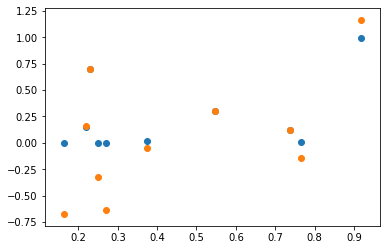

In [370]:
plt.scatter(test_x[:, 0], y)
plt.scatter(test_x[:, 0], y_)
plt.show()

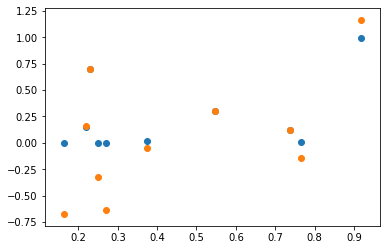

In [372]:
plt.scatter(test_x[:, 0], y)
plt.scatter(test_x[:, 0], y_)
plt.show()

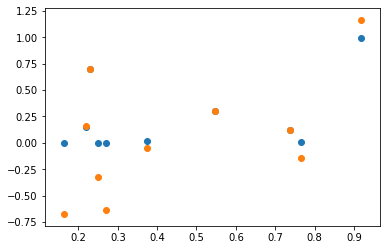

In [373]:
plt.scatter(test_x[:, 0], y)
plt.scatter(test_x[:, 0], y_)
plt.show()

## Experiment 2: digits recognition

We trained an artificial neural networks to recognise digits from 0 to 9 using the famous **MNIST** dataset. The **MNIST** dataset contains 1797 digits images of size $8 \times 8$ and their corresponding labels. 

### The MNIST dataset
First, we load the MNIST dataset from sklearn and see what it looks like.

In [394]:
from sklearn.datasets import load_digits
digits = load_digits()   #load the dataset from sklearn

The variable **digits** has three subsets: 
* **images**: which are $8\times8$ digits images.
* **data**: which are vectors(1D arrays) of length 64(data[i] = reshape(images[i], (64)))
* **target**: which are the corresponding numbers in those images(datas).

Size of images is:
(1797, 8, 8)
Size of datas is:
(1797, 64)
Size of targets is:
(1797,)


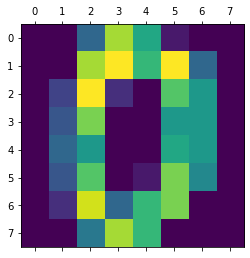

In [395]:
images = digits.images
datas = digits.data
targets = digits.target

print('Size of images is:')
print(images.shape)
print('Size of datas is:')
print(datas.shape)
print('Size of targets is:')
print(targets.shape)

plt.matshow(images[0]) 
plt.show()

The values in the images(datas) are integers ranging from 0 to 15.

In [396]:
print(datas[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


We need to standardize those inputs to $(-1, 1)$ first so that it will help the training of ANN convergent. We will use the function **StandardScaler** from sklearn to help us scaling the inputs.

In [397]:
from sklearn.preprocessing import StandardScaler
InputScaling = StandardScaler()
X = InputScaling.fit_transform(datas)
print(X[0][:5])

[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751]


The labels in the variable **targets** are 0-9 integers which are the digits in the corresponding image.

In [398]:
print('The label of the image above is %d'%(targets[0]))

The label of the image above is 0


However, we do not use 0-9 integers in the ANN as output, instead, we use an one-hot vector of lenth 10 to indicate the corresponding digits. By the word **one-hot** I mean it's a binary vector with only one element of which is 1 and others are 0. For example, I can use vector **[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]** to indicate digit 1, and use **[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]** to indicate digit 3. So I need to write a function to transform those targets into one-hot vectors.

In [402]:
import numpy as np
def num2vect(y):
    y_vect = np.zeros((len(y), 10))
    for i in range(len(y)):
        y_vect[i, y[i]] = 1
    return y_vect
y = num2vect(targets)
print('The label of the image above is transformed to:')
print(y[0])

The label of the image above is transformed to:
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Now we are going to use a function **train_test_split** from sklearn to randomly choose some elements in **datas** and **targets** as traning set and make the remains as test set.

In [403]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
print(X_train.shape)
print(X_train[0][0:5])
print(y_train.shape)
print(y_train[0])

(1078, 64)
[ 0.         -0.33501649 -1.09493684  0.50949529  0.03544399]
(1078, 10)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Training an ANN
We created a three layer artificail neural network to recognize those digits. The ANN has 68 inputs, 30 hidden layer neurons and 10 outputs.

The 10 outputs correspond to the 10 elements in the transformed label(one-hot vector).

But we shouldn't expect the output of the ANN to also be an on-hot vector. Actually, the outputs we get from the ANN may look like this: **[0.01, 0.1, 0.08, 0.16, 0.75, 0.03, 0.21, 0.02, 0.03, 0.15]**, and we assume the one with the biggest number(closet to 1)  **0.75** indicates the most likely digits the image will be. And in this case, the most likely digit is **4**.

In [405]:
w1 = np.random.rand(64, 30)
#weights between layer 1(hidden) # one output
w2 = np.random.rand(30, 10)

b1 = np.random.rand(30)
b2 = np.random.rand(10)
#bias
inib = [b1, b2]
#learning rate
alpha = 0.25
maxiter = 5000
iniW = [w1, w2]
ActFun = ['sigmoid', 'sigmoid'] #select activation functions for the hidden layer and output layer
W, b, trainMSE, trainMape, testMSE, testMape = bp_train_ann(X_train, y_train, X_test, y_test,
                                       iniW, inib, alpha, maxiter, ActFun, verify = False)

100 iteration finished!

200 iteration finished!

300 iteration finished!

400 iteration finished!

500 iteration finished!

600 iteration finished!

700 iteration finished!

800 iteration finished!

900 iteration finished!

1000 iteration finished!

1100 iteration finished!

1200 iteration finished!

1300 iteration finished!

1400 iteration finished!

1500 iteration finished!

1600 iteration finished!

1700 iteration finished!

1800 iteration finished!

1900 iteration finished!

2000 iteration finished!

2100 iteration finished!

2200 iteration finished!

2300 iteration finished!

2400 iteration finished!

2500 iteration finished!

2600 iteration finished!

2700 iteration finished!

2800 iteration finished!

2900 iteration finished!

3000 iteration finished!

3100 iteration finished!

3200 iteration finished!

3300 iteration finished!

3400 iteration finished!

3500 iteration finished!

3600 iteration finished!

3700 iteration finished!

3800 iteration finished!

3900 iteration finish

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


Now we have trained a ANN which would provide us a label vector once we feed in a digits image. The next thing to do is transform the label vector into digits.

In [431]:
def digitRec(W, b, X, ActFun):
    m = X.shape[0]
    if len(X.shape) == 2:
        y = np.zeros((m,))
        for i in range(m):
            Y = ann(X[i, :], W, b, ActFun)
            y[i] = np.argmax(Y[-1])
    else:
        Y = ann(X, W, b, ActFun)
        y = np.argmax(Y[-1])
    return y

In [432]:
def vec2num(vec):
    if len(vec.shape) == 1:
        num = np.argmax(vec)
    else:
        num = np.zeros(vec.shape[0])
        for i in range(vec.shape[0]):
            num[i] = np.argmax(vec[i])
    return num

Evaluate the recognition accuracy of the trained ANN.

In [434]:
from sklearn.metrics import accuracy_score
y_rec = digitRec(W, b, X_test, ActFun)
print('Rcognition accuracy is:')
accuracy_score(vec2num(y_test), y_rec)*100

Rcognition accuracy is:


90.82058414464534

### Here are a few recognition demos:

Real digit is 0, recognized as 0


<Figure size 432x288 with 0 Axes>

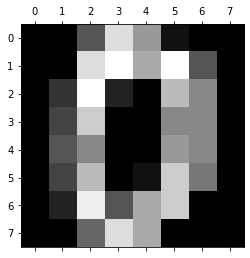

In [437]:
ind = 0
pred = digitRec(W, b, X[ind], ActFun)
print('Real digit is %d, recognized as %d'%(targets[ind], pred))
plt.gray() 
plt.matshow(digits.images[ind]) 
plt.show()

Real digit is 1, recognized as 1


<Figure size 432x288 with 0 Axes>

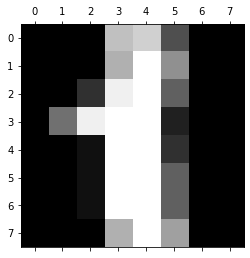

In [438]:
ind = 1
pred = digitRec(W, b, X[ind], ActFun)
print('Real digit is %d, recognized as %d'%(targets[ind], pred))
plt.gray() 
plt.matshow(digits.images[ind]) 
plt.show()

Real digit is 2, recognized as 2


<Figure size 432x288 with 0 Axes>

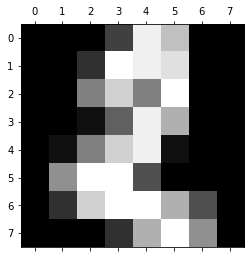

In [439]:
ind = 2
pred = digitRec(W, b, X[ind], ActFun)
print('Real digit is %d, recognized as %d'%(targets[ind], pred))
plt.gray() 
plt.matshow(digits.images[ind]) 
plt.show()

Real digit is 3, recognized as 3


<Figure size 432x288 with 0 Axes>

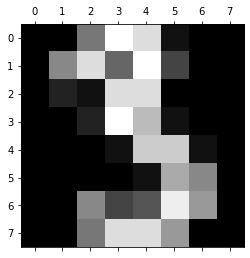

In [440]:
ind = 3
pred = digitRec(W, b, X[ind], ActFun)
print('Real digit is %d, recognized as %d'%(targets[ind], pred))
plt.gray() 
plt.matshow(digits.images[ind]) 
plt.show()